In [101]:
#Importings

import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Covid-19-Project 2020

# 1.Scrapping Data 

In [102]:
# Making Soup + Scrapping
#song_soup=BeautifulSoup(open("https://www.worldometers.info/coronavirus/"),"html.parser")# the output corresponds exactly to the html fil

regions=['Africa','Europe','Latin caribbean','Northern america','Oceania']
url='https://www.worldometers.info/coronavirus/'
url1='https://www.worldometers.info/population/countries-in-asia-by-population/'
Url_list=['https://www.worldometers.info/population/countries-in-africa-by-population/'
          ,'https://www.worldometers.info/population/countries-in-europe-by-population/'
          ,'https://www.worldometers.info/population/countries-in-latin-america-and-the-caribbean-by-population/'
          ,'https://www.worldometers.info/population/countries-in-northern-america-by-population/'
          ,'https://www.worldometers.info/population/countries-in-oceania-by-population/']

In [103]:
def Df_by_rigion(url,reg,flag):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"html.parser")
    #Create list of Columns
    cols_raw=soup.find('thead') #find Thead module
    cols=cols_raw.find_all("th") #find all th in the Thead
    columns_list=[] #New list
    
    if(flag==0):
        text=soup.find(id="example2").get_text()
        for x in cols: 
            if (x.get_text()=='Country (or dependency)' or x.get_text()=='Population (2020)' ):
                columns_list.append(x.get_text()) #append all th into list
            
        # scrap All table
        list_of_lists=[] # list of lists for each row
        table_raw=soup.find('tbody')
        table=table_raw.find_all('tr')
  
        for row in table:
            counter=0
            uni_row_list=[] #1 row list
            uni_row=row.find_all('td')
            for i in uni_row:
                if(counter==1 or counter==2):
                    uni_row_list.append(i.get_text())
                counter+=1
            list_of_lists.append(uni_row_list)
        
        corona_df_func = pd.DataFrame.from_records(list_of_lists, columns=columns_list)
        corona_df_func['Region']=reg
    else:
        #response = requests.get(url)
        #soup = BeautifulSoup(response.text,"html.parser")
        #print(soup.prettify()) 
        #print(text)
        #Create list of Columns
        #cols_raw=soup.find('thead') #find Thead module
        #cols=cols_raw.find_all("th") #find all th in the Thead
        #columns_list=[] #New list
        text=soup.find(id="main_table_countries_today").get_text()
        for x in cols: #append all th into list
            columns_list.append(x.get_text())
        #print(columns_list)
        # scrap All table
        list_of_lists=[] # list of lists for each row
        table_raw=soup.find('tbody')
        table=table_raw.find_all('tr')
        
        for row in table:
            uni_row_list=[] #1 row list
            uni_row=row.find_all('td')
            for i in uni_row:
                uni_row_list.append(i.get_text())
            list_of_lists.append(uni_row_list)
        
        corona_df_func = pd.DataFrame.from_records(list_of_lists, columns=columns_list)
        corona_df_func['Population']='0'
        corona_df_func['Region']='0'
    return corona_df_func

In [104]:
Reg_pop_df0=Df_by_rigion(url1,'Asia',0)
counter=0
for val in Url_list:
    Reg_pop_df=Reg_pop_df0.append(Df_by_rigion(val,regions[counter],0))
    Reg_pop_df0=Reg_pop_df
    counter+=1

In [105]:
#Testing, see with There is a connection with the site

In [106]:
corona_df=Df_by_rigion(url,0,1)

In [107]:
corona_df.drop(corona_df.columns[[8, 9]], axis = 1, inplace = True)

In [108]:
Reg_pop_df['Country (or dependency)'].iloc[67]='IvoryCoast'
counter=0
for i in range (len(corona_df)):
    for j in range (len(Reg_pop_df)):
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United States'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='USA'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='St. Vincent & Grenadines'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='St.VincentGrenadines'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United Kingdom'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='UK'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='South Korea'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='S.Korea' 
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Czech Republic (Czechia)'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='Czechia'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United Arab Emirates'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='UAE'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='State of Palestine'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='Palestine'   
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='DR Congo'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='DRC'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Saint Kitts & Nevis'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='SaintKittsandNevis' 
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Holy See'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='VaticanCity' 
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Central African Republic'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='CAR'
        if(Reg_pop_df['Country (or dependency)'].iloc[j]=='St. Vincent & Grenadines'):
               Reg_pop_df['Country (or dependency)'].iloc[j]='St.VincentGrenadines'    
        if(corona_df['Country,Other'].iloc[i]==Reg_pop_df['Country (or dependency)'].iloc[j]):
            corona_df['Population'].iloc[i]=Reg_pop_df['Population (2020)'].iloc[j]
            corona_df['Region'].iloc[i]=Reg_pop_df['Region'].iloc[j]
            


In [109]:
corona_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population,Region
0,USA,"265,506","+20,629","6,786",+716,"11,983","246,737","5,781","331,002,651",Northern america
1,Italy,"119,827","+4,585","14,681",+766,"19,758","85,388","4,068","60,461,826",Europe
2,Spain,"117,710","+5,645","10,935",+587,"30,513","76,262","6,416","46,754,778",Europe
3,Germany,"89,838","+5,044","1,230",+123,"24,575","64,033","3,936","83,783,942",Europe
4,France,"59,105",,"5,387",,"12,428","41,290","6,399","65,273,511",Europe
...,...,...,...,...,...,...,...,...,...,...
201,Caribbean Netherlands,2,,,,,2,,"26,223",Latin caribbean
202,Sierra Leone,2,,,,,2,,"7,976,983",Africa
203,Papua New Guinea,1,,,,,1,,"8,947,024",Oceania
204,Timor-Leste,1,,,,,1,,"1,318,445",Asia


# 2.Cleaning and Reformating

### Describing data types

In [110]:
#Data info
print (corona_df.info())
####Here we need to change all str's to int's ######
####But first we need to do data cleaning ##########

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
Country,Other       206 non-null object
TotalCases          206 non-null object
NewCases            206 non-null object
TotalDeaths         206 non-null object
NewDeaths           206 non-null object
TotalRecovered      206 non-null object
ActiveCases         206 non-null object
Serious,Critical    206 non-null object
Population          206 non-null object
Region              206 non-null object
dtypes: object(10)
memory usage: 16.2+ KB
None


### Cleaning data 

In [111]:
#Here we clear all unnecessary data
length=len(corona_df)
for col in corona_df:
    temp_name_col=col
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace('+','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace(',','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace('\n','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace(' ','')
    for i in range(length):
        if(corona_df[temp_name_col][i]==''):
            corona_df[temp_name_col][i]='0'

In [112]:
corona_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population,Region
0,USA,265506,20629,6786,716,11983,246737,5781,331002651,Northernamerica
1,Italy,119827,4585,14681,766,19758,85388,4068,60461826,Europe
2,Spain,117710,5645,10935,587,30513,76262,6416,46754778,Europe
3,Germany,89838,5044,1230,123,24575,64033,3936,83783942,Europe
4,France,59105,0,5387,0,12428,41290,6399,65273511,Europe
...,...,...,...,...,...,...,...,...,...,...
201,CaribbeanNetherlands,2,0,0,0,0,2,0,26223,Latincaribbean
202,SierraLeone,2,0,0,0,0,2,0,7976983,Africa
203,PapuaNewGuinea,1,0,0,0,0,1,0,8947024,Oceania
204,Timor-Leste,1,0,0,0,0,1,0,1318445,Asia


### Reformating data

In [113]:
#Convert Data into Usefull ints
for col in corona_df:
    if(col!='Reported1st case' and col!='Country,Other' and col!='Region' ):
            corona_df[col]=corona_df[col].astype(str).astype(int)


In [114]:
#Check data info
print (corona_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
Country,Other       206 non-null object
TotalCases          206 non-null int32
NewCases            206 non-null int32
TotalDeaths         206 non-null int32
NewDeaths           206 non-null int32
TotalRecovered      206 non-null int32
ActiveCases         206 non-null int32
Serious,Critical    206 non-null int32
Population          206 non-null int32
Region              206 non-null object
dtypes: int32(8), object(2)
memory usage: 9.8+ KB
None


In [115]:
corona_df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.00000,2.060000e+02
mean,5214.820388,287.320388,276.635922,18.543689,1097.349515,3840.834951,189.18932,3.701871e+07
std,23977.870161,1606.033652,1457.439398,97.013077,6340.840836,19823.027321,888.42207,1.438909e+08
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000e+00
25%,19.000000,0.000000,0.000000,0.000000,1.000000,15.250000,0.00000,7.753440e+05
50%,188.000000,5.000000,3.000000,0.000000,14.000000,146.000000,1.00000,6.725000e+06
75%,1078.000000,45.000000,20.000000,1.000000,71.500000,900.750000,16.00000,2.410918e+07
max,265506.000000,20629.000000,14681.000000,766.000000,76571.000000,246737.000000,6416.00000,1.439324e+09


# Visualiztion

### Total Covid-19 spread worldwide

In [116]:
world=corona_df.groupby("Country,Other")["TotalCases","ActiveCases","TotalDeaths"].sum().reset_index()

figure = px.choropleth(world, locations="Country,Other",
                      locationmode='country names',color="ActiveCases",
                      hover_name='Country,Other',range_color=[1,5000],
                      color_continuous_scale="Peach",
                      title='Countries with Active Cases') 
figure.show()

Active Cases observations :

1) Most of the countries have crossed the 10000 Acive cases per country, while some of them can control the spread of the virus and have kept it under 1000.

2) China is one of the only nations which has been decreasing the active number of cases

3) But in some other nations like the US, Italy, Spain, France,and most important ISRAEL, the number of active cases is rising rapidly

### Total Death spread worldwide

In [51]:
world['size'] = world['TotalDeaths'].pow(0.2)
fig = px.scatter_geo(world, locations="Country,Other",locationmode='country names', color="TotalDeaths",
                     hover_name="Country,Other", size="size",
                     projection="natural earth",title='Death count of each country')
fig.show()

###  Top active cases worldwide

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

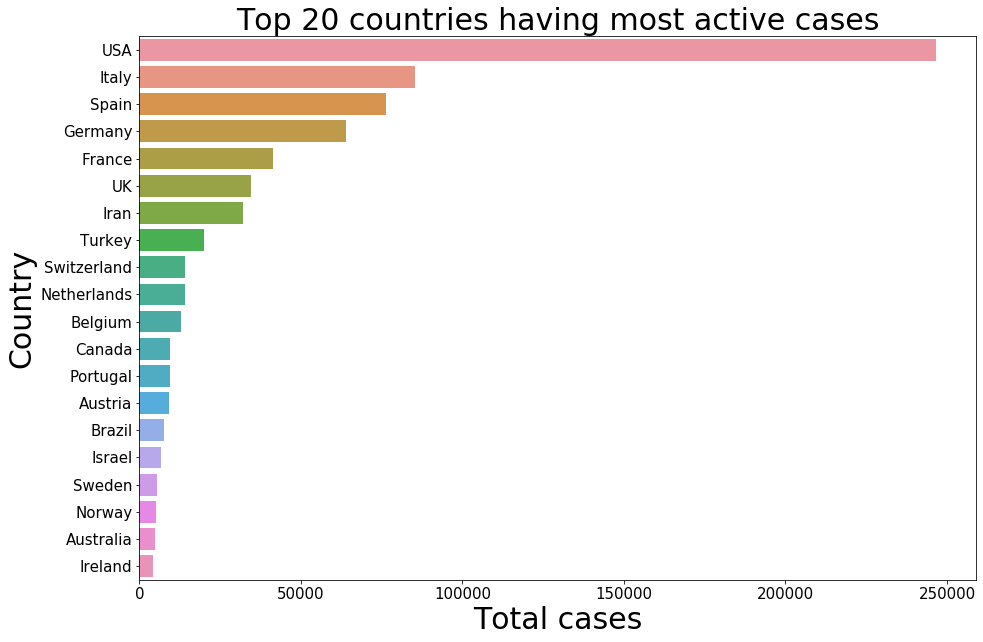

In [117]:
active_df = world.groupby(by = 'Country,Other')['ActiveCases'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = active_df.ActiveCases, y = active_df['Country,Other']) # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

1)We can see that USA,Italy,Spain,Germany are in top of the world

2)As the covid-19 testing is increasing, The active number of cases is also increasing day by day

3)In comparison with the total population, Italy, Spain, Germany and France are the worst-hit nation

4) (While me made this project) israel jumped to the top of the 20 Countries in the world

### Top Deaths worldwide 

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

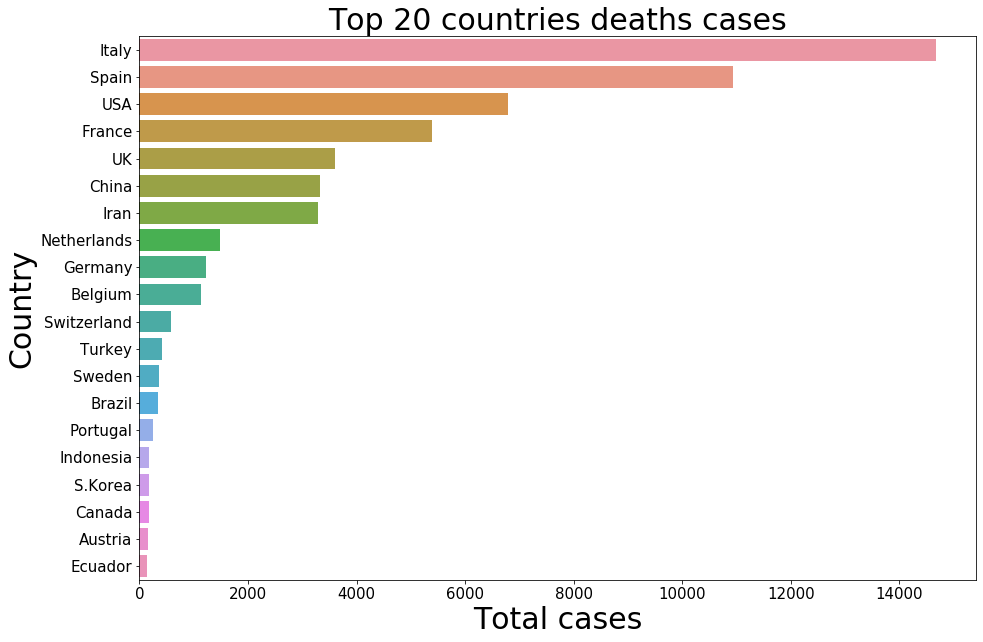

In [119]:
deaths_df = world.groupby(by = 'Country,Other')['TotalDeaths'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Deaths cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries deaths cases" , fontsize = 30)
ax = sns.barplot(x = deaths_df.TotalDeaths, y = deaths_df['Country,Other']) # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

We can see that obviously Italy,Spain and USA are having most Deaths in the top of the world death cases

### Top recovered cases

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

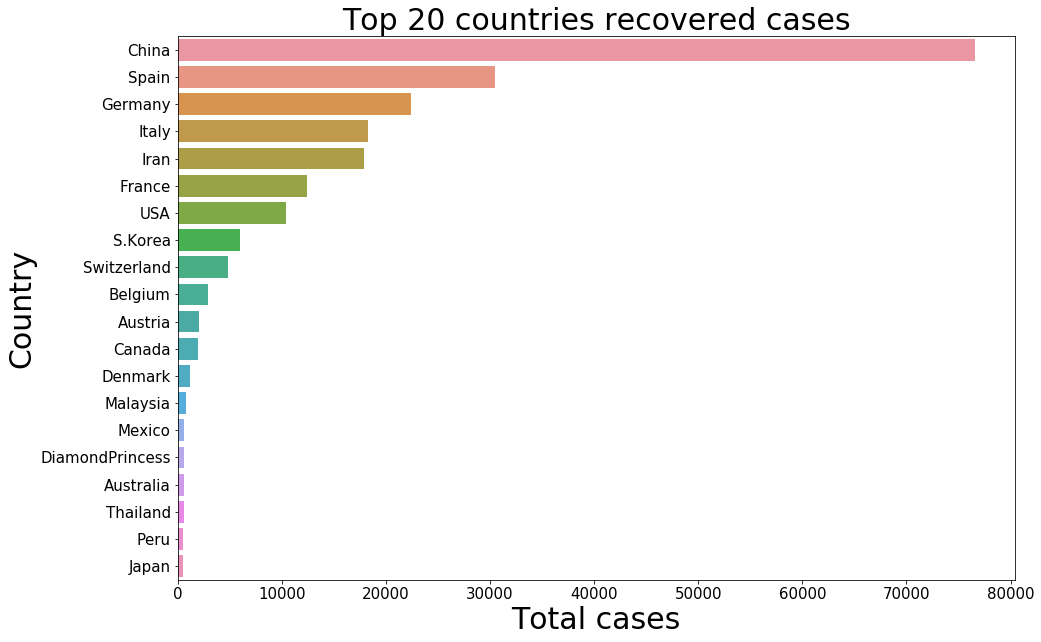

In [80]:
#Total recovered
recovered_df = corona_df.groupby(by = 'Country,Other')['TotalRecovered'].sum().sort_values(ascending = False).head(20).reset_index()

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Recovered numbers",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries recovered cases" , fontsize = 30)
ax = sns.barplot(x = recovered_df.TotalRecovered, y = recovered_df['Country,Other']) # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

1) By far China is leading in the number of recoveries 

2) Italy, Iran, and Spain are also doing a good job.


### Top 20 countries having the worst mortality and best recovery 

In [135]:
ratio_df = corona_df.groupby(by = 'Country,Other')['TotalCases','TotalRecovered','TotalDeaths'].sum().reset_index()
ratio_df['RecoveryPercentage'] =  round(((ratio_df['TotalRecovered']) / (ratio_df['TotalCases'])) * 100 , 2)
ratio_df['death percentage'] =  round(((ratio_df['TotalDeaths']) / (ratio_df['TotalCases'])) * 100 , 2)
ratio_df.head()


,"Country,Other",TotalCases,TotalRecovered,TotalDeaths,RecoveryPercentage,death percentage
0,Afghanistan,281,10,6,3.56,2.14
1,Albania,304,89,17,29.28,5.59
2,Algeria,1171,62,105,5.29,8.97
3,Andorra,439,16,16,3.64,3.64
4,Angola,8,1,2,12.50,25.00


In [140]:
ratio_top=ratio_df.groupby(by = 'Country,Other')['death percentage'].sum().sort_values(ascending = False).head(20).reset_index()
ratio_top

,"Country,Other",death percentage
0,Botswana,25.00
1,Angola,25.00
2,Gambia,25.00
3,MSZaandam,22.22
4,Guyana,21.05
5,Nicaragua,20.00
6,Sudan,20.00
7,Mauritania,16.67
8,CaboVerde,16.67
9,Syria,12.50


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

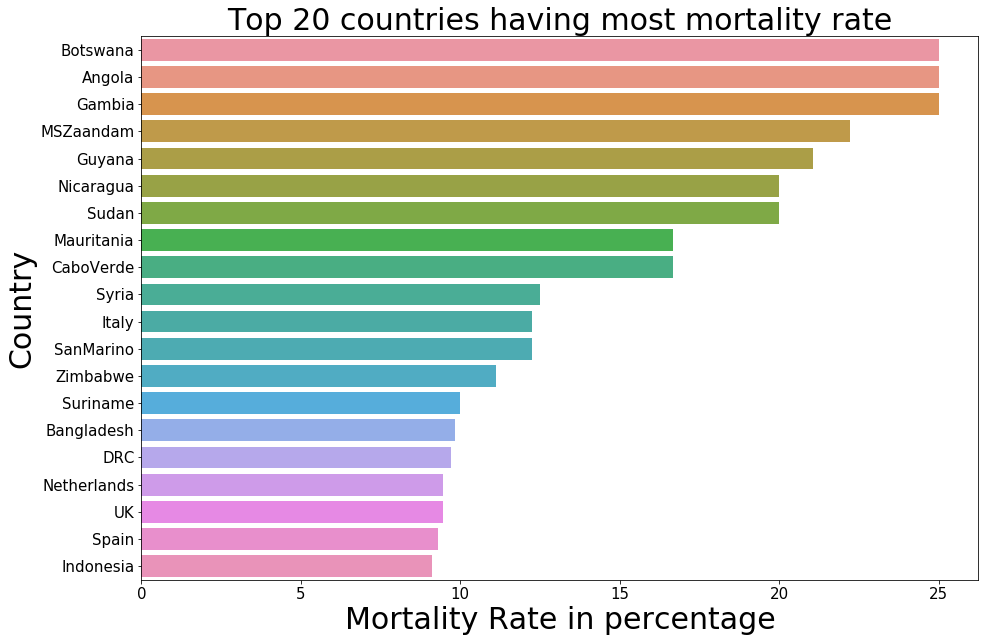

In [134]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = ratio_top['death percentage'], y = ratio_top['Country,Other'])
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

1) Botswana,Angola, Nicaragua MSZaandam and the Gambia have the highest mortality rate because there is very less number of the confirmed cases, yet there more deaths in them.

2) When more than 10000 active cases are considered, Italy is at the top and this percentage rate is very scary. It seems that they have lost control over the spread of covid-19 and cannot contain it.¶

In [150]:
ratio_top_r=ratio_df.groupby(by = 'Country,Other')['RecoveryPercentage'].sum().sort_values(ascending = False).head(20).reset_index()
ratio_top_r

,"Country,Other",RecoveryPercentage
0,China,93.81
1,DiamondPrincess,86.94
2,Maldives,68.42
3,S.Korea,59.84
4,Bahrain,56.85
5,FaeroeIslands,50.84
6,Gambia,50.00
7,Brunei,48.51
8,Gibraltar,48.42
9,Bangladesh,42.62


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Best recovery Rate in percentage')]

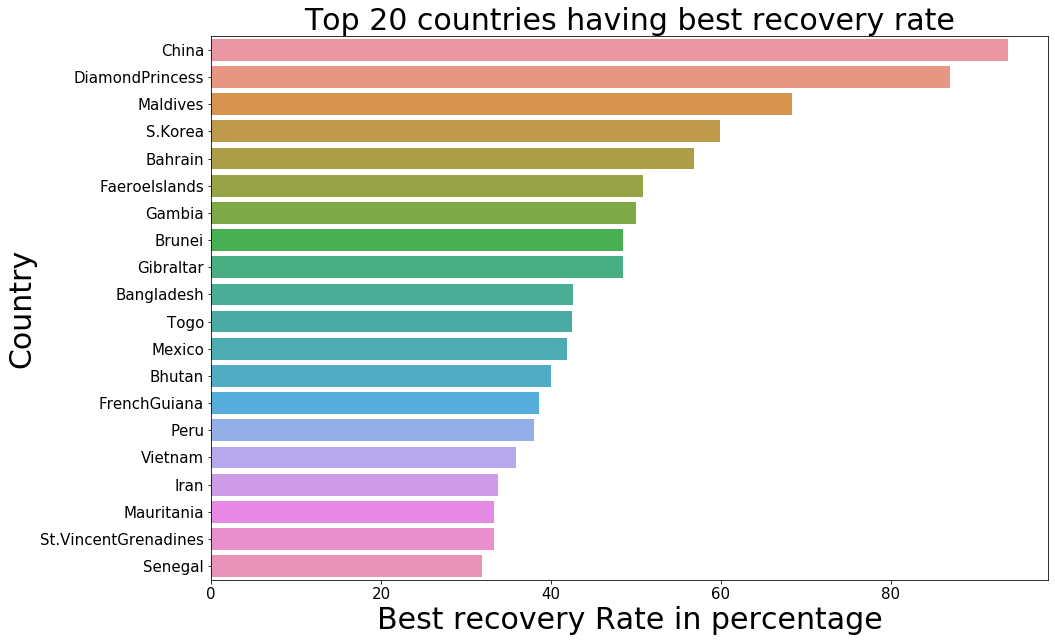

In [153]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having best recovery rate" , fontsize = 30)
ax = sns.barplot(x = ratio_top_r['RecoveryPercentage'], y = ratio_top_r['Country,Other'])
ax.set(xlabel='Best recovery Rate in percentage', ylabel='Country')

1) China tops the chart and they are doing a remarkable job with a recovery rate of 90%. It tells us that in every 100 infected people, 90 people have recovered from the covid-19 virus.

2) The Cruise ship is unusual here as the outbreak was a while ago and it explains the high recovery rate.

3) South Korea, Bahrain and Iran are also doing a fantastic job treating the covid-19 virus.




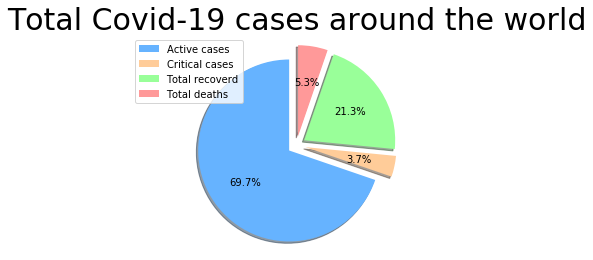

In [20]:
labels = ['Active cases', 'Critical cases', 'Total recoverd', 'Total deaths']
sizes = [(corona_df['ActiveCases'].sum()-corona_df['Serious,Critical'].sum()),corona_df['Serious,Critical'].sum(),corona_df['TotalRecovered'].sum(),corona_df['TotalDeaths'].sum()]
colors = ['#66b3ff','#ffcc99', '#99ff99','#ff9999']
explode = (0.1, 0.1, 0.1, 0.1)

fig1 , ax1=plt.subplots()

ax1.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Total Covid-19 cases around the world",fontsize = 30)
#ax1.legend(labels, loc="best")
ax1.legend(labels, loc="best")

ax1.axis('equal')
plt.show()


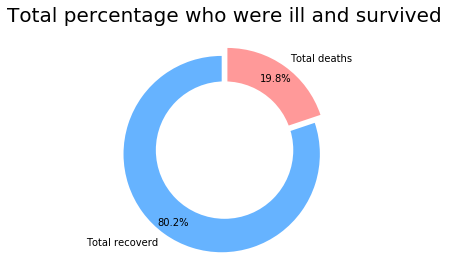

In [21]:
# Pie chart
labels = ['Total recoverd','Total deaths']
sizes = [corona_df['TotalRecovered'].sum(),corona_df['TotalDeaths'].sum()]
sizes_total_were_sick=[corona_df['TotalRecovered'].sum()+corona_df['TotalDeaths'].sum()]
#colors
colors = ['#66b3ff','#ff9999']
#explsion
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.title("Total percentage who were ill and survived",fontsize = 20)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()




# Plot
#plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
#plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)


hello
